In [11]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

# Molecular modeling  

## About molecular modeling  

## How molecular modeling works 

### The `Pose` object 

The pose object holds all of the information for a protein structure, including conformation and scoring. 

### Scoring

#### Atom-level scoring 

There are four fundemental forces at play for molecules. Gravity, strong nuclear, electroweak we ignore. That leaves electrostatics. 

##### Coulomb forces 

Functional form 

$$G\frac{q_1q_2}{r^2}$$

##### Lennard–Jones potential 

Functional form 

$$
\epsilon [(\frac{r_m}{r})^6 - 2(\frac{r_m}{r})^{12}]
$$

Let's examine the Lennard-Jones potentials for some of the different atom types that are available in `trust`. 

In [12]:
import pandas 
import numpy as np 

df = pandas.read_csv('database/lennard_jones_params.csv', sep='\s+')
df.head()

,name,atom,lj_radius,lj_wdepth,lk_dgfree,lk_lambda,lk_volume
0,CNH2,C,1.968297,0.094638,3.077030,3.5,13.500
1,COO,C,1.916661,0.141799,-3.332648,3.5,14.653
2,CH0,C,2.011760,0.062642,1.409284,3.5,8.998
3,CH1,C,2.011760,0.062642,-3.538387,3.5,10.686
4,CH2,C,2.011760,0.062642,-1.854658,3.5,18.331


In [10]:
df.groupby('atom').mean()

,lj_radius,lk_dgfree,lk_lambda,lk_volume
atom,,,,
C,1.986318,1.165504,3.50000,14.898333
H,0.992687,0.000000,3.50000,0.000000
N,1.802452,-5.979359,5.12675,11.390729
O,1.534971,-7.194365,3.50000,10.763120
S,1.975967,0.792207,3.50000,20.440000
X,0.000000,0.000000,3.50000,0.000000


In [33]:
%%timeit 

def lj(r, rm, depth):
#     rmr = rm/r
    #return depth * (rmr**6 - 2*rmr**12)

    
    #r**12 = r**6 * r**6 
    r6 = (rm/r)**6
    return depth * r6 * (1 - 2*r6)


xvals = np.linspace(1.96, 6, 50) 
yvals = lj(xvals, 1.96, 0.09) 

# performance evaluation 

10000 loops, best of 3: 24.2 µs per loop


In [37]:
%%timeit 

def lj(r, rm, depth):
    rmr = rm/r
    return depth * (rmr**6 - 2*rmr**12)

    
    #r**12 = r**6 * r**6 
#     r6 = (rm/r)**6
#     return depth * r6 * (1 - 2*r6)


xvals = np.linspace(1.96, 6, 50) 
yvals = lj(xvals, 1.96, 0.09) 

# performance evaluation 

10000 loops, best of 3: 27.4 µs per loop


In [38]:
%%timeit 

def lj(r, rm, depth):
    rmr = rm/r
    return depth * (rmr**6 - 2*rmr**6*rmr**6)

    
    #r**12 = r**6 * r**6 
#     r6 = (rm/r)**6
#     return depth * r6 * (1 - 2*r6)


xvals = np.linspace(1.96, 6, 50) 
yvals = lj(xvals, 1.96, 0.09) 

# performance evaluation 

10000 loops, best of 3: 33.3 µs per loop


In [45]:
%%timeit 

def lj(r, rm, depth):
    return depth * ((rm/r)**6 - 2*(rm/r)**12)

xvals = np.linspace(1.96, 6, 50) 
yvals = lj(xvals, 1.96, 0.09) 

# performance evaluation 

10000 loops, best of 3: 28.6 µs per loop


In [40]:
xvals = np.linspace(1.96, 6, 50) 
yvals = lj(xvals, 1.96, 0.09) 

[<matplotlib.text.Text at 0x114809160>, <matplotlib.text.Text at 0x11468ceb8>]

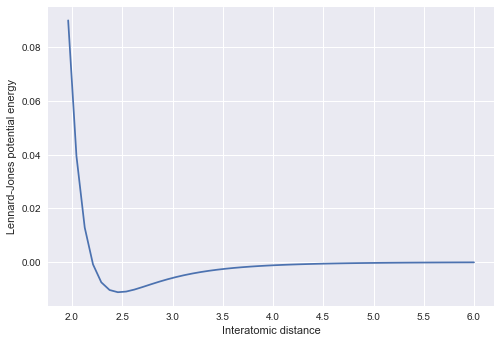

In [43]:
fig, ax = plt.subplots()
ax.plot(xvals, -yvals)
ax.set(xlabel='Interatomic distance', ylabel='Lennard-Jones potential energy')

In [8]:

data = []
for idx, row in df.iloc[0:28, ].iterrows():
    name, element, radius, well_depth, dgfree, lamb, volume, *rest = row['cat'].str.split()
    pkg = name, element, radius, well_depth, dgfree, volume
    data.append(pkg) 
    
cols = 'name, element, radius, well_depth, dgfree, volume'.split(', ')
df = pandas.DataFrame(data, columns=cols)
df

AttributeError: 'str' object has no attribute 'str'